In [14]:
#Import the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add the latitudes and longitudes in a list.
coordinates = list(lat_lngs)

In [17]:
# import the citipy module.
from citipy import citipy

In [18]:
# Create a list for holding the cities.
cities=[]
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

606

In [19]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [20]:
# Starting URL for weather map API call.
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [21]:
#Import the datetime module from the datetime library.
from datetime import datetime

In [22]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint url for each city.
    city_url = url + "&q=" + city
        
    #log the url,record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #Add 1 to the record count.
    record_count += 1
        
    #Run an API request for each of the cities.
    try:
         #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | saint-louis
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | camacha
Processing Record 6 of Set 1 | koster
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | oussouye
Processing Record 9 of Set 1 | narsaq
Processing Record 10 of Set 1 | awjilah
Processing Record 11 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | san carlos de bariloche
Processing Record 14 of Set 1 | waddan
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | hihifo
City not found. Skipping...
Processing Record 17 of Set 1 | leningradskiy
Processing Record 18 of Set 1 | grand gaube
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | castro
Pro

Processing Record 39 of Set 4 | toronto
Processing Record 40 of Set 4 | batagay
Processing Record 41 of Set 4 | bismarck
Processing Record 42 of Set 4 | vao
Processing Record 43 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 44 of Set 4 | fort frances
Processing Record 45 of Set 4 | ondorhaan
City not found. Skipping...
Processing Record 46 of Set 4 | daru
Processing Record 47 of Set 4 | banda aceh
Processing Record 48 of Set 4 | kamaishi
Processing Record 49 of Set 4 | matelandia
Processing Record 50 of Set 4 | ngaoundere
Processing Record 1 of Set 5 | kuandian
Processing Record 2 of Set 5 | itanhaem
Processing Record 3 of Set 5 | upernavik
Processing Record 4 of Set 5 | arvin
Processing Record 5 of Set 5 | gaoua
Processing Record 6 of Set 5 | saldanha
Processing Record 7 of Set 5 | pangnirtung
Processing Record 8 of Set 5 | havre-saint-pierre
Processing Record 9 of Set 5 | xinqing
Processing Record 10 of Set 5 | meulaboh
Processing Record 11 of Set 5 | san cristoba

Processing Record 33 of Set 8 | buala
Processing Record 34 of Set 8 | victor harbor
Processing Record 35 of Set 8 | nekhayevskiy
Processing Record 36 of Set 8 | the valley
Processing Record 37 of Set 8 | senador jose porfirio
Processing Record 38 of Set 8 | gornoye loo
Processing Record 39 of Set 8 | paracuru
Processing Record 40 of Set 8 | kirakira
Processing Record 41 of Set 8 | geraldton
Processing Record 42 of Set 8 | grindavik
Processing Record 43 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 8 | ginda
Processing Record 45 of Set 8 | kaele
Processing Record 46 of Set 8 | brae
Processing Record 47 of Set 8 | port arthur
Processing Record 48 of Set 8 | santo tomas
Processing Record 49 of Set 8 | nanfeng
Processing Record 50 of Set 8 | amuntai
Processing Record 1 of Set 9 | tananger
Processing Record 2 of Set 9 | beringovskiy
Processing Record 3 of Set 9 | izhevskoye
Processing Record 4 of Set 9 | sibolga
Processing Record 5 of Set 9 | urucara
Processing

Processing Record 20 of Set 12 | rio grande
Processing Record 21 of Set 12 | takoradi
Processing Record 22 of Set 12 | halalo
City not found. Skipping...
Processing Record 23 of Set 12 | tahoua
Processing Record 24 of Set 12 | nhulunbuy
Processing Record 25 of Set 12 | sivaki
Processing Record 26 of Set 12 | ribas do rio pardo
Processing Record 27 of Set 12 | egvekinot
Processing Record 28 of Set 12 | barra
Processing Record 29 of Set 12 | salmas
Processing Record 30 of Set 12 | jati
Processing Record 31 of Set 12 | pong
Processing Record 32 of Set 12 | kusatsu
Processing Record 33 of Set 12 | leh
Processing Record 34 of Set 12 | petrolina
Processing Record 35 of Set 12 | plettenberg bay
Processing Record 36 of Set 12 | mandiana
Processing Record 37 of Set 12 | bani walid
Processing Record 38 of Set 12 | kalabo
Processing Record 39 of Set 12 | wabrzezno
Processing Record 40 of Set 12 | bargal
City not found. Skipping...
Processing Record 41 of Set 12 | ajaccio
Processing Record 42 of S

In [23]:
len(city_data)

562

In [24]:
#Convert the array of dictionaries to a panda dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.4081,57.7000,73.69,83,40,2.30,MU,2021-11-22 21:25:30
1,Saint-Louis,16.3333,-15.0000,85.64,15,90,8.86,SN,2021-11-22 21:25:30
2,Albany,42.6001,-73.9662,39.09,54,68,1.01,US,2021-11-22 21:21:32
3,Punta Arenas,-53.1500,-70.9167,48.31,40,75,23.02,CL,2021-11-22 21:22:11
4,Camacha,33.0833,-16.3333,65.62,88,40,8.05,PT,2021-11-22 21:25:31
5,Koster,-25.8630,26.8976,58.41,85,100,4.36,ZA,2021-11-22 21:25:31
6,Cape Town,-33.9258,18.4232,65.10,59,0,23.02,ZA,2021-11-22 21:21:03
7,Oussouye,12.4850,-16.5469,80.78,74,100,5.88,SN,2021-11-22 21:25:32
8,Narsaq,60.9167,-46.0500,23.22,75,100,4.85,GL,2021-11-22 21:25:32
9,Awjilah,29.1081,21.2869,64.47,47,18,10.42,LY,2021-11-22 21:25:33


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2021-11-22 21:25:30,-20.4081,57.7000,73.69,83,40,2.30
1,Saint-Louis,SN,2021-11-22 21:25:30,16.3333,-15.0000,85.64,15,90,8.86
2,Albany,US,2021-11-22 21:21:32,42.6001,-73.9662,39.09,54,68,1.01
3,Punta Arenas,CL,2021-11-22 21:22:11,-53.1500,-70.9167,48.31,40,75,23.02
4,Camacha,PT,2021-11-22 21:25:31,33.0833,-16.3333,65.62,88,40,8.05
5,Koster,ZA,2021-11-22 21:25:31,-25.8630,26.8976,58.41,85,100,4.36
6,Cape Town,ZA,2021-11-22 21:21:03,-33.9258,18.4232,65.10,59,0,23.02
7,Oussouye,SN,2021-11-22 21:25:32,12.4850,-16.5469,80.78,74,100,5.88
8,Narsaq,GL,2021-11-22 21:25:32,60.9167,-46.0500,23.22,75,100,4.85
9,Awjilah,LY,2021-11-22 21:25:33,29.1081,21.2869,64.47,47,18,10.42


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the city_data into a csv.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [27]:
#Extract relevant fields from the dataframe for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
#Import the time module.
import time

# Get today's date.
today = time.strftime("%x")
today

'11/22/21'

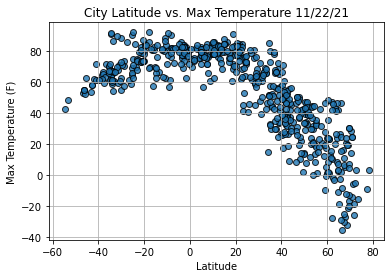

In [29]:
#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x") )
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

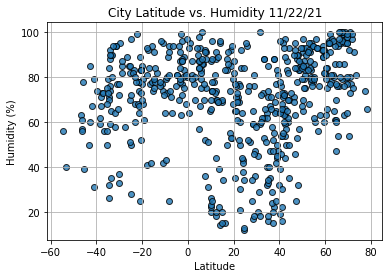

In [30]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Humidity " + time.strftime("%x") )
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

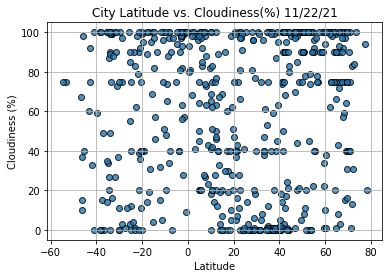

In [31]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Cloudiness(%) " + time.strftime("%x") )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

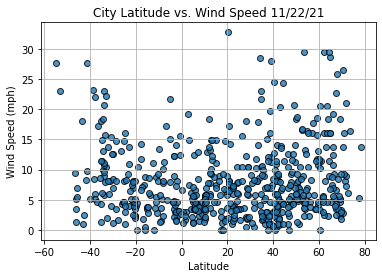

In [32]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x") )
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [33]:
#Import linear regression from the Scipy stats module.
from scipy.stats import linregress

In [34]:
#Create a function to create perform linear regression on the weather data  and  
# plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y-values" from the slope and the intercept.
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line.
    line_eq = "y= " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color= "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is {r_value:.3f}")

In [35]:
index13 = city_data_df.loc[13]
index13

City                       Lompoc
Country                        US
Date          2021-11-22 21:25:34
Lat                       34.6391
Lng                     -120.4579
Max Temp                    84.85
Humidity                       32
Cloudiness                      1
Wind Speed                  10.36
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
557     True
558     True
559     True
560    False
561     True
Name: Lat, Length: 562, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Saint-Louis,SN,2021-11-22 21:25:30,16.3333,-15.0000,85.64,15,90,8.86
2,Albany,US,2021-11-22 21:21:32,42.6001,-73.9662,39.09,54,68,1.01
4,Camacha,PT,2021-11-22 21:25:31,33.0833,-16.3333,65.62,88,40,8.05
7,Oussouye,SN,2021-11-22 21:25:32,12.4850,-16.5469,80.78,74,100,5.88
8,Narsaq,GL,2021-11-22 21:25:32,60.9167,-46.0500,23.22,75,100,4.85


In [38]:
# Create Northern and Southern Hemisphere dataframes.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

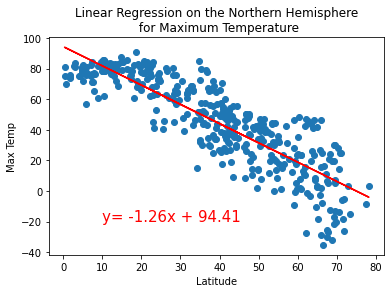

The r-value is -0.868


In [39]:
#linear regression on the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for Maximum Temperature", "Max Temp", (10,-20))

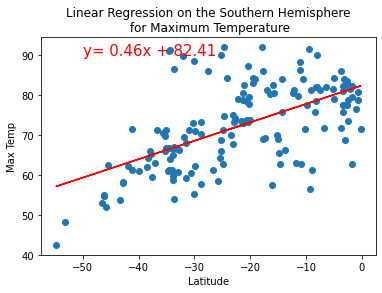

The r-value is 0.592


In [40]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for Maximum Temperature", "Max Temp", (-50,90))

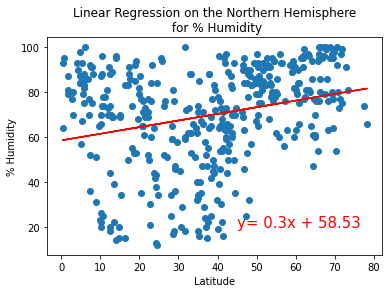

The r-value is 0.267


In [41]:
#linear regression on the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Humidity", "% Humidity", (45,20))

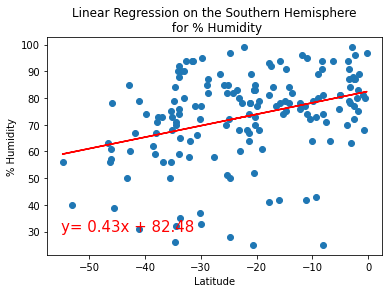

The r-value is 0.341


In [42]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for % Humidity", "% Humidity", (-55,30))

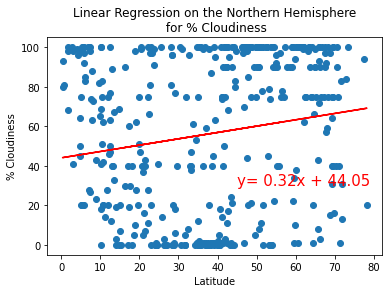

The r-value is 0.165


In [43]:
#linear regression on the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Cloudiness", "% Cloudiness", (45,30))

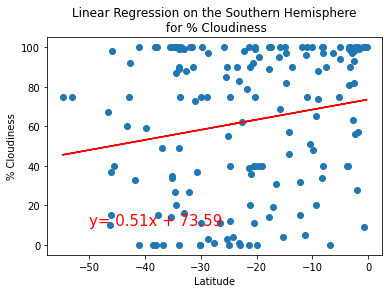

The r-value is 0.188


In [44]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for % Cloudiness", "% Cloudiness", (-50,10))

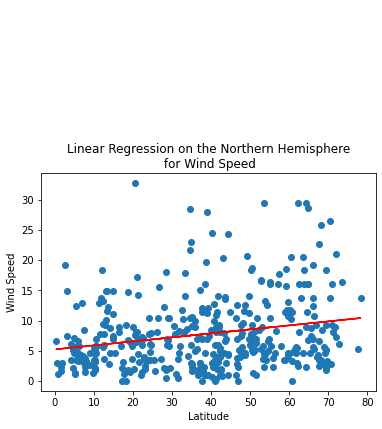

The r-value is 0.224


In [45]:
#linear regression on the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for Wind Speed", "Wind Speed", (10,60))

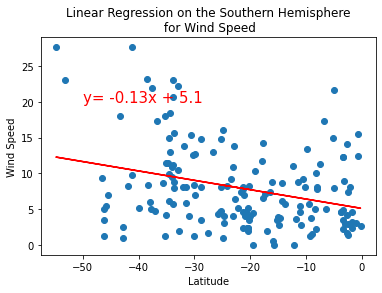

The r-value is -0.302


In [46]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for Wind Speed", "Wind Speed", (-50,20))